<h1><center>DSO 599 - Final Project</center></h1>
<h2><center>Deep Learning Applications on SPX Volatility Forecasting</center></h2>
<h3><center>Francis Chen</center></h3>

## Abstract

Within the financial markets, volatility plays a crucial role in many areas such as portfolio construction, derivatives pricing, risk management, and hedging strategies. Accurately predicting volatility can be vital for an asset manager and could lead to large advantages in the investment space. Modeling volatility has been extensively researched and familiar models, such as GARCH, EGARCH, and variations of the two, have been used in countless papers. However, while most financial data exhibit non-linear characteristics, the classic models generally assume a linear structure. With the explosion in computing power, Deep Learning methods, such as Artificial Neural Networks (ANNs), can now be utilized freely. Their flexible ability to approximate any nonlinear function arbitrarily without prior assumptions on the data distribution make Neural Networks invaluable in predicting volatility. This paper will explore applications of a Simple Multilayer Perceptron (MLP) model as well as a Recurrent Neural Network on forecasting the well-known CBOE VIX Index.

## 1. Introduction

The CBOE Volatility Index, known by its ticker symbol VIX, is the most popular measure of the stock market's future (next 30 calendar days) expected volatility implied by the S&P 500 Index options chain. It is calculated and disseminated on a real-time basis by the Chicago Board Options Exchange (CBOE). This paper seeks to model the expected implied volatility (IV) of the market rather than the future realized volatility (RV) because most derivatives are priced using IV. Thus, the ability to accurately predict future implied volatility provides much more value to the asset manager. Note that only small code blocks will be displayed throughout this paper; the entire code can be found in the appendix.

## 2. Data Collection and Feature Engineering

Historical daily data of the CBOE VIX Index was collected from the official CBOE website with a date range from January 2, 1990 to date. In addition, historical daily data with the same date range was collected for the S&P 500 Index from Yahoo Finance. Only the daily closing values of these indices are used for the deep learning models. 

Additional custom features were then calculated using the S&P 500 daily closing prices to provide additional information to the neural networks. These specific custom features are very common technical indicators within the investment landscape and the reasoning behind them is beyond the scope of this paper.
- **Annualized Realized Volatility of the S&P 500 Index**: $RV = \sqrt{\frac{252}{n}\displaystyle\sum_{i=1}^{n} r_i^2}$
    * Where $r_i^2$ is the square of the daily log return of the S&P 500 Index for the $i^{th}$ trading day in the rolling window period. This is because returns are assumed to be centered at 0.
- **Simple Return of the S&P 500 Index for $n$ trading days**: $R_n = \frac{p_n}{p_1} - 1$
    * Where $p_i$ is the closing price of the S&P 500 Index for the $i^{th}$ trading day in the rolling window period.
- **Simple Short Moving Average vs Long Moving Average**: $SMA = \Big(\frac{1}{k}\displaystyle\sum_{i=1}^{k} p_i \Big/\frac{1}{j}\displaystyle\sum_{i=1}^{j} p_i\Big) - 1$ where $j > k$
    * In this paper, $j = 20, k = 200$. Essentially, this how much larger or smaller the short term moving average is compared to the long term moving average up to time $t$.
- **Maximum Drawdown of the Period**: This is simply the minimum return from peak to trough of the S&P 500 Index closing prices for the $n$ period rolling window. No formal mathematical notation will be written to avoid confusion, please refer to the code in the appendex for calculation specifics.

Note that $n$ is the number of trading days in the rolling period window, which will be assumed to be 20 for all custom features in order to be consistent with the monthly view of the CBOE VIX Index. As well, the VIX is divided by 100 in the data set given that it is a measure of return volatility and this is actually represented as a percent by CBOE.

Finally, the data is cleaned by removing any null values and a sample of the first 5 rows is as follows:

,VIX,RV,Return_20D,ShortVLongSMA,Max_DD_Period
1990-10-15,0.3164,0.2285,-0.0458,-0.0903,-0.0726
1990-10-16,0.3145,0.2339,-0.0618,-0.0924,-0.0726
1990-10-17,0.3137,0.2328,-0.0563,-0.0942,-0.0726
1990-10-18,0.2960,0.2400,-0.0184,-0.0944,-0.0726
1990-10-19,0.2786,0.2521,0.0037,-0.0937,-0.0726


A clearer visualization of the features for forecasting implied volatility is below:

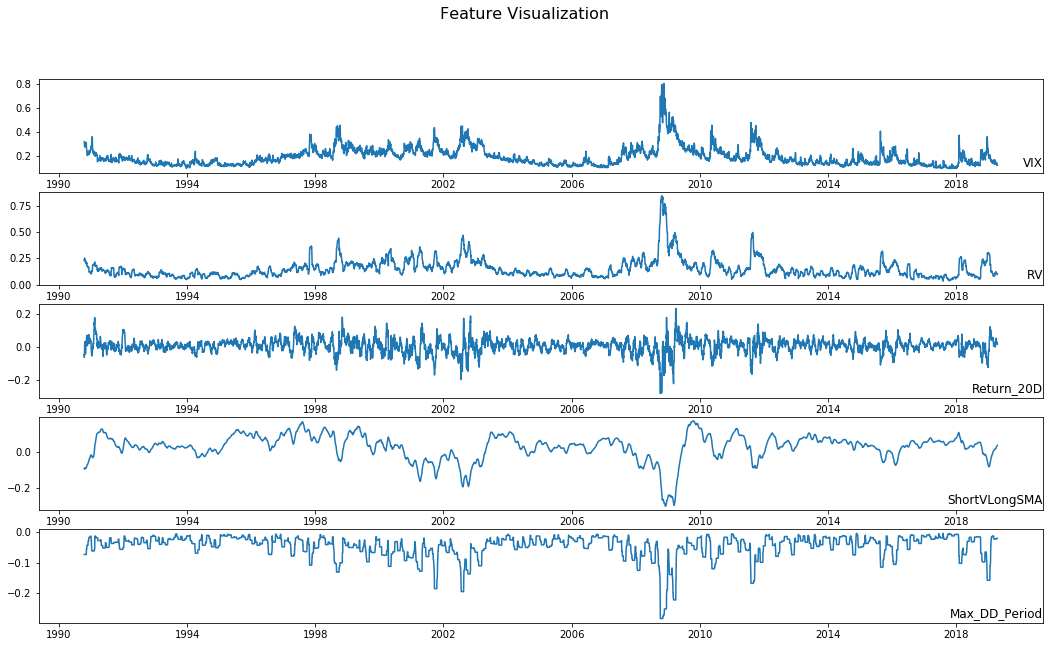

## 3. Data Preprocessing

After collecting and aggregating the data, the next step is to split the data into training, validation, and test sets. As well, the raw time-series data must also be converted to allow for supervised learning.

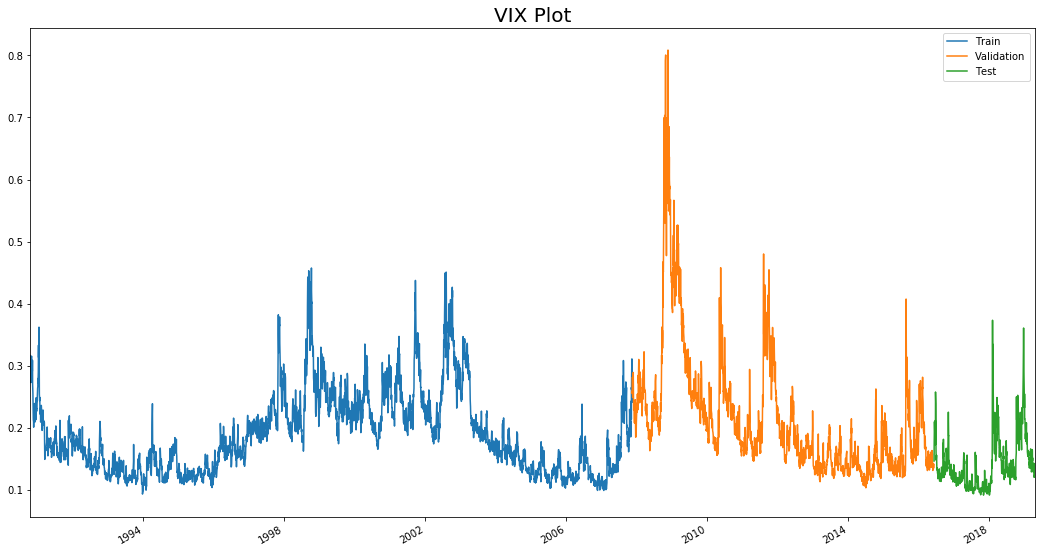

## 4. Modeling

##### 4.1 Simple MLP

A simple MLP

In [72]:
# Splitting Data into Training, Validation, and Test sets
train, validation, test = time_series_to_supervised_learning(data)

# Splitting into input and outputs
train_x, train_y, validation_x, validation_y, test_x, test_y = dataset_tensors(train, validation, test, 
                                                                               rnn = False, normalize = False)

Training Set Shapes:  (4310, 5) (4310,)
Validation Set Shapes:  (2155, 5) (2155,)
Test Set Shapes:  (719, 5) (719,)


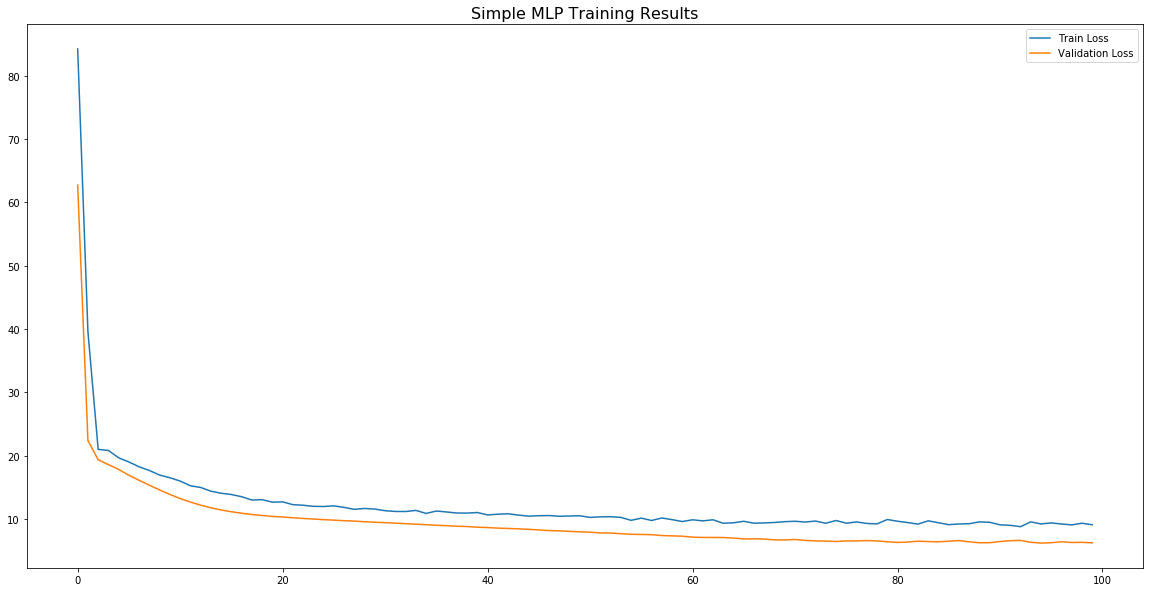

Validation RMSE: 0.033
Test RMSE: 0.016


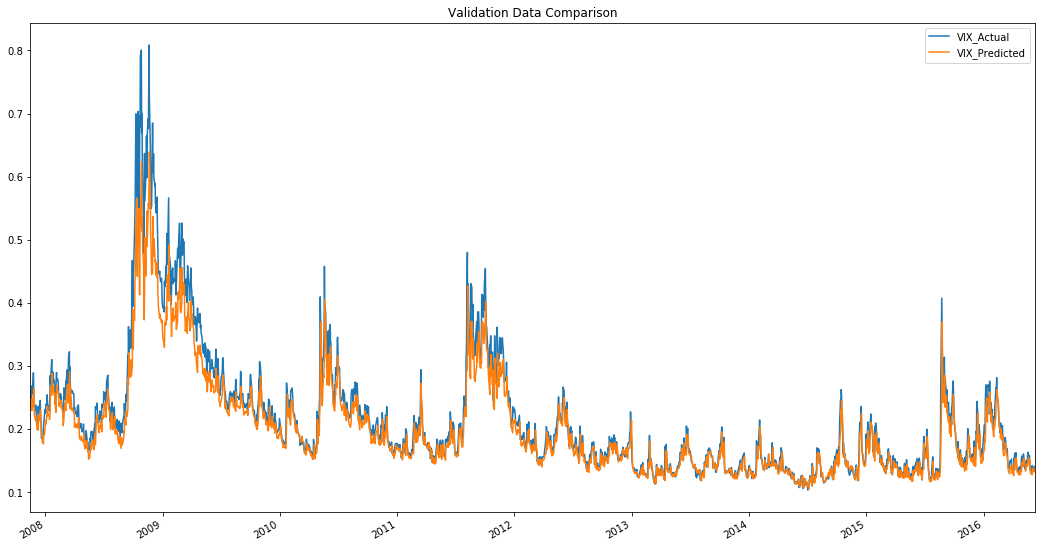

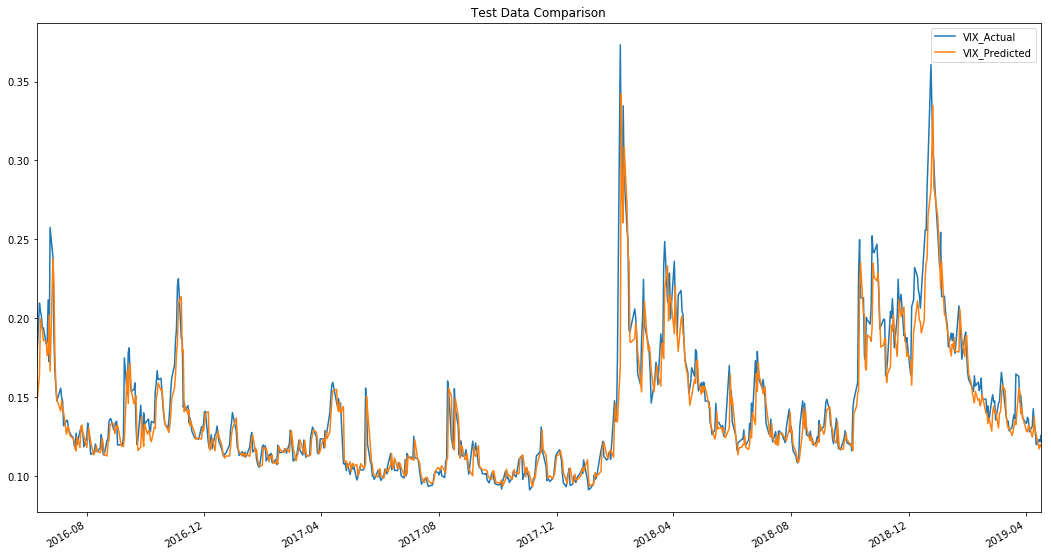

In [76]:
model_mlp = keras.models.Sequential()
model_mlp.add(keras.layers.Dense(9, input_dim = train_x.shape[1], activation = 'tanh'))
model_mlp.add(keras.layers.Dense(6, input_dim = train_x.shape[1], activation = 'tanh'))
model_mlp.add(keras.layers.Dense(1))
model_mlp.compile(loss='mean_absolute_percentage_error', optimizer='adam')

checkpointer_mlp = keras.callbacks.ModelCheckpoint(filepath="MLP_mae_weights.hdf5", 
                                                   verbose=0, save_best_only=True)

history_mlp = model_mlp.fit(train_x, train_y, epochs = n_epochs, 
                            batch_size = batchsize, 
                            validation_data = (validation_x, validation_y), 
                            verbose = 0, shuffle = False, 
                            callbacks = [checkpointer_mlp])
# plot history
pyplot.figure(figsize=(20, 10))
pyplot.plot(history.history['loss'], label='Train Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Simple MLP Training Results', size = 16)
pyplot.legend()
pyplot.show()

model_evaluation(model_mlp, validation, test, validation_x, validation_y, test_x, test_y, rnn = False)

##### 4.2 LSTM

Using LSTM

In [65]:
# Since all features are between -1 and 1 by definition, normalization is unnecessary

# Splitting into input and outputs

# Reshaping data to be 3D [samples, timesteps, features] for tensor operations

train_x, train_y, validation_x, validation_y, test_x, test_y = dataset_tensors(train, validation, test, 
                                                                               rnn = True, normalize = False)

Training Set Shapes:  (4310, 1, 5) (4310,)
Validation Set Shapes:  (2155, 1, 5) (2155,)
Test Set Shapes:  (719, 1, 5) (719,)


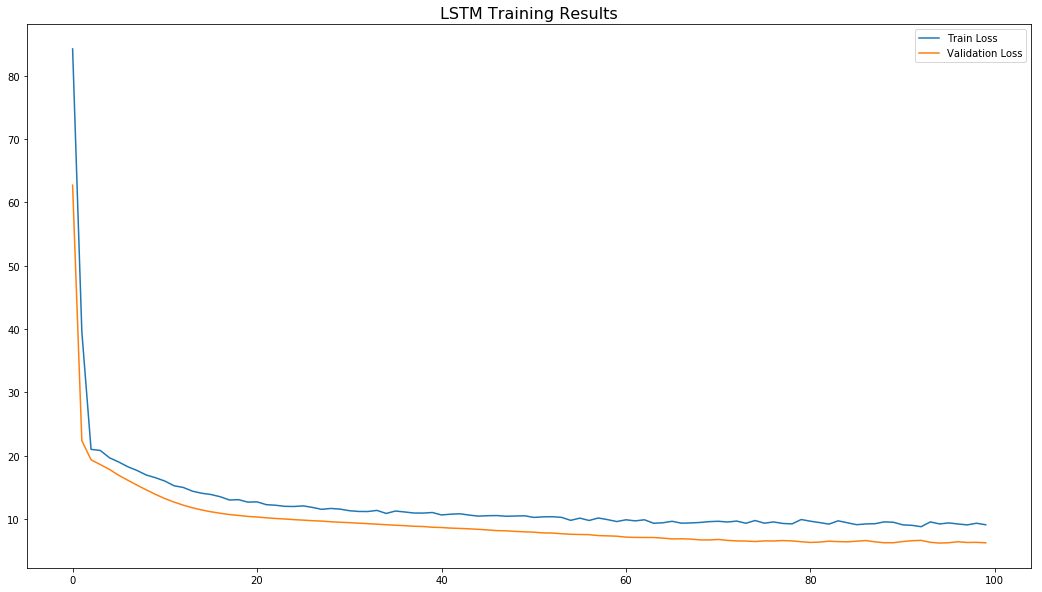

Validation RMSE: 0.024
Test RMSE: 0.016


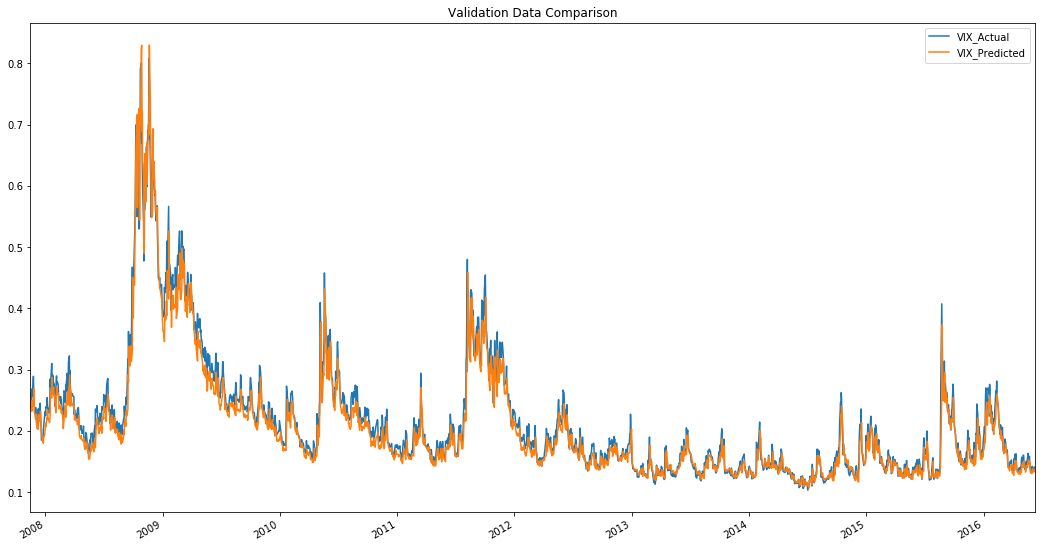

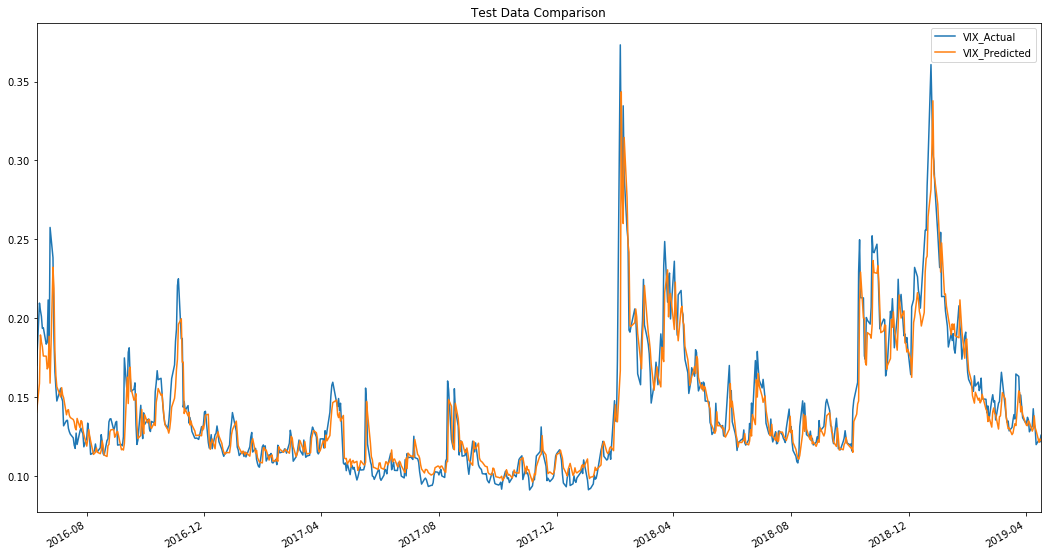

In [68]:
# design network
# 50 neurons with 100 Epochs with batch size of 200
neurons = 30
n_epochs = 100
batchsize = 200

model = keras.models.Sequential()
model.add(keras.layers.LSTM(neurons, input_shape=(train_x.shape[1], train_x.shape[2]), activation = 'tanh',
                            dropout=0.05))
model.add(keras.layers.Dense(1))
model.compile(loss = 'mean_absolute_percentage_error', optimizer = 'adam')

# fit network
checkpointer = keras.callbacks.ModelCheckpoint(filepath="LSTM_mae_weights.hdf5", verbose=0, save_best_only=True)

history = model.fit(train_x, train_y, epochs = n_epochs, 
                    batch_size = batchsize, validation_data=(validation_x, validation_y), 
                    verbose=0, shuffle=False, callbacks = [checkpointer])
# plot history
pyplot.figure(figsize=(18, 10))
pyplot.plot(history.history['loss'], label = 'Train Loss')
pyplot.plot(history.history['val_loss'], label = 'Validation Loss')
pyplot.title('LSTM Training Results', size = 16)
pyplot.legend()
pyplot.show()

model_evaluation(model, validation, test, validation_x, validation_y, test_x, test_y, rnn = True)

### Links
- https://www.datacamp.com/community/tutorials/lstm-python-stock-market
- https://codeburst.io/neural-networks-for-algorithmic-trading-volatility-forecasting-and-custom-loss-functions-c030e316ea7e
- https://medium.com/@alexrachnog/neural-networks-for-algorithmic-trading-part-one-simple-time-series-forecasting-f992daa1045a
- https://towardsdatascience.com/an-introduction-on-time-series-forecasting-with-simple-neura-networks-lstm-f788390915b
- https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
- https://github.com/guillaume-chevalier/seq2seq-signal-prediction
- https://gist.github.com/lukovkin/1aefa4509e066690b892
- https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

## Appendix

In [ ]:
############################################# Importing modules #############################################

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import urllib.request as urlreq
import json
import os
import tensorflow.keras as keras
os.chdir('.\ModelWeights')

from matplotlib import pyplot
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

############################################# Data Collection #############################################

### Collecting VIX and SPX index data from CBOE and Yahoo Finance

# VIX Data Collection
curr_vix = pd.read_csv('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv', 
                       skiprows = 1, index_col = 0)
curr_vix.index = pd.to_datetime(curr_vix.index)

hist_vix = pd.read_excel('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixarchive.xls',
                         skiprows = 1, index_col = 0)
hist_vix.index = pd.to_datetime(hist_vix.index)

vix = pd.concat([hist_vix,curr_vix], axis = 0)

# SPX Data Collection
ticker = '^GSPC'
start_date = dt.datetime(1990,1,1)
end_date = end_date = dt.datetime.today()

start_date_unix = int(start_date.timestamp())
end_date_unix = int(end_date.timestamp())

hist_price_url = 'https://query1.finance.yahoo.com/v8/finance/chart/{0}?symbol={0}&period1={1}&period2={2}&interval=1d'.format(ticker,start_date_unix,end_date_unix)

with urlreq.urlopen(hist_price_url) as url:
    data = json.loads(url.read().decode())
    hist_prices = pd.DataFrame({**data['chart']['result'][0]['indicators']['quote'][0], **data['chart']['result'][0]['indicators']['adjclose'][0]},
                               index = [dt.datetime.utcfromtimestamp(int(x)).date() for x in data['chart']['result'][0]['timestamp']])
    hist_prices.index = pd.to_datetime(hist_prices.index)
    hist_prices.columns = ["{0}_{1}".format(ticker.replace('^',''), x) for x in hist_prices.columns]

# Joining both VIX and SPX data into one dataframe and backfilling null values
data = pd.concat([hist_prices[['GSPC_close']], vix[['VIX Close']]], 
                 axis = 1).replace('n/a',np.nan).apply(lambda x: pd.to_numeric(x)).fillna(method = 'ffill')
data.columns = [col.replace('VIX Close','VIX') for col in data.columns.tolist()]

# Dividing VIX_Close by 100 given the index is a measure of implied future volatility
data['VIX'] = data['VIX']/100

# Calculating 20 Trading Day Rolling Realized Annualized Volatility for the SPX Index

data['RV'] = np.log(data['GSPC_close']/data['GSPC_close'].shift(1))**2
data['RV'] = np.sqrt(data['RV'].rolling(window = 20).mean()*252)

# Returns for 20 Day for the SPX Index
data['Return_20D'] = data.GSPC_close.pct_change(20)
    
# Short Period vs Long Period Simple Moving Average Measure
short_window = 20
long_window = 200
data['ShortVLongSMA'] = data.GSPC_close.rolling(window = short_window).mean()/data.GSPC_close.rolling(window = long_window).mean() - 1

data['Max_DD_Period'] = data.GSPC_close/data.GSPC_close.rolling(window = 20).max() - 1
data['Max_DD_Period'] = data['Max_DD_Period'].rolling(window = 20).min()
data = data.dropna().iloc[:,1:]

# Plotting Time Series of Features

pyplot.figure(figsize = (18,10))
for variable in range(data.shape[1]):
    pyplot.subplot(data.shape[1], 1, variable + 1)
    pyplot.plot(data.iloc[:, variable])
    pyplot.title(data.columns[variable], y = 0, loc = 'right')
pyplot.suptitle('Feature Visualization', size = 16)

############################################# Custom Functions #############################################

# Function for splitting data into training, validation, and testing sets

def time_series_to_supervised_learning(data, timesteps = 1, y_col = 'VIX', train_pct = 0.6, validation_pct = 0.3):
    out_data = data.copy()
    out_data['{}_Prediction'.format(y_col)] = out_data[y_col].shift(-timesteps)
    out_data = out_data.dropna()
    
    train = out_data.iloc[:round(len(out_data)*train_pct),:]
    validation = out_data.iloc[len(train):len(train) + round(len(out_data)*validation_pct), :]
    test = out_data[out_data.index > validation.index[-1]]
    
    return train, validation, test

# Function for Splitting into input and outputs and normalizing and reshaping if required
def dataset_tensors(train, validation, test, rnn = True, normalize = False):
    
    if normalize:
        # normalize features
        scaler = MinMaxScaler(feature_range=(0, 1))

        # Fit transform on training data
        train_scaled = scaler.fit_transform(train)

        # Normalize data using fitted transform from training data
        validation_scaled = scaler.transform(validation)
        test_scaled = scaler.transform(test)

        # Splitting into input and outputs
        train_x, train_y = train_scaled[:, :-1], train_scaled[:, -1]
        validation_x, validation_y = validation_scaled[:, :-1], validation_scaled[:, -1]
        test_x, test_y = test_scaled[:, :-1], test_scaled[:, -1]
    else:
        
        # Splitting into input and outputs without normalizing
        train_x, train_y = train.values[:, :-1], train.values[:, -1]
        validation_x, validation_y = validation.values[:, :-1], validation.values[:, -1]
        test_x, test_y = test.values[:, :-1], test.values[:, -1]
    
    if rnn:
        # Reshaping data to be 3D [samples, timesteps, features] for tensor operations
        train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
        validation_x = validation_x.reshape((validation_x.shape[0], 1, validation_x.shape[1]))
        test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
    
    
    print('Training Set Shapes: ', train_x.shape, train_y.shape)
    print('Validation Set Shapes: ',validation_x.shape, validation_y.shape)
    print('Test Set Shapes: ',test_x.shape, test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

# Function for evaluating deep learning regression models
def model_evaluation(model, validation, test, validation_x, validation_y, test_x, test_y, rnn = True):
    
    # make a prediction
    yhat_validation = model.predict(validation_x).reshape(validation_y.shape)
    yhat_test = model.predict(test_x).reshape(test_y.shape)

    # calculate RMSE
    rmse_validation = np.sqrt(mean_squared_error(validation_y, yhat_validation))
    rmse_test = np.sqrt(mean_squared_error(test_y, yhat_test))
    
    validation_performance = pd.DataFrame({'VIX_Actual': validation_y,
                                           'VIX_Predicted': yhat_validation}).set_index(validation.index).shift(1).dropna()
    validation_performance.plot(figsize = (18,10), title = 'Validation Data Comparison')
    
    test_performance = pd.DataFrame({'VIX_Actual': test_y,
                                 'VIX_Predicted': yhat_test}).set_index(test.index).shift(1).dropna()
    test_performance.plot(figsize = (18,10), title = 'Test Data Comparison')
    
    print('Validation RMSE: %.3f' % rmse_validation)
    print('Test RMSE: %.3f' % rmse_test)

############################################# LSTM #############################################
# LSTM Data Preparation
# Shifting timestep only 1 day
train, validation, test = time_series_to_supervised_learning(data)

# Plotting the data sets
pyplot.figure(figsize=(18, 10))
ax = train.VIX.plot()
validation.VIX.plot(ax=ax)
test.VIX.plot(ax=ax)
pyplot.legend(['Train', 'Validation', 'Test'])
pyplot.title('VIX Plot', size = 20)

# Since all features are between -1 and 1 by definition, normalization is unnecessary


# Splitting into input and outputs

# Reshaping data to be 3D [samples, timesteps, features] for tensor operations

train_x, train_y, validation_x, validation_y, test_x, test_y = dataset_tensors(train, validation, test, 
                                                                               rnn = True, normalize = False)


# design network
# 50 neurons with 100 Epochs with batch size of 200
neurons = 30
n_epochs = 100
batchsize = 200

model = keras.models.Sequential()
model.add(keras.layers.LSTM(neurons, input_shape=(train_x.shape[1], train_x.shape[2]), activation = 'tanh',
                            dropout=0.05))
model.add(keras.layers.Dense(1))
model.compile(loss = 'mean_absolute_percentage_error', optimizer = 'adam')

# fit network
checkpointer = keras.callbacks.ModelCheckpoint(filepath="LSTM_mae_weights.hdf5", verbose=0, save_best_only=True)

history = model.fit(train_x, train_y, epochs = n_epochs, 
                    batch_size = batchsize, validation_data=(validation_x, validation_y), 
                    verbose=0, shuffle=False, callbacks = [checkpointer])
# plot history
pyplot.figure(figsize=(18, 10))
pyplot.plot(history.history['loss'], label = 'Train Loss')
pyplot.plot(history.history['val_loss'], label = 'Validation Loss')
pyplot.title('LSTM Training Results', size = 16)
pyplot.legend()
pyplot.show()

model_evaluation(model, validation, test, validation_x, validation_y, test_x, test_y, rnn = True)

############################################# Simple MLP #############################################

# Using Simple MLP to predict 20 day out
# Splitting Data into Training, Validation, and Test sets

train, validation, test = time_series_to_supervised_learning(data)

# Splitting into input and outputs
train_x, train_y, validation_x, validation_y, test_x, test_y = dataset_tensors(train, validation, test, 
                                                                               rnn = False, normalize = False)

# design network
# 100 Epochs with batch size of 200

model_mlp = keras.models.Sequential()
model_mlp.add(keras.layers.Dense(9, input_dim = train_x.shape[1], activation = 'tanh'))
#model.add(keras.layers.Dropout(0.1))
#model_mlp.add(keras.layers.Dense(6, activation = 'tanh'))
model_mlp.add(keras.layers.Dense(1))
model_mlp.compile(loss='mean_absolute_percentage_error', optimizer='adam')
# fit network
checkpointer_mlp = keras.callbacks.ModelCheckpoint(filepath="MLP_mae_weights.hdf5", verbose=0, save_best_only=True)

history_mlp = model_mlp.fit(train_x, train_y, epochs = n_epochs, 
                            batch_size = batchsize, validation_data=(validation_x, validation_y), 
                            verbose=0, shuffle=False, callbacks = [checkpointer_mlp])
# plot history
pyplot.figure(figsize=(20, 10))
pyplot.plot(history.history['loss'], label='Train Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Simple MLP Training Results', size = 16)
pyplot.legend()
pyplot.show()

model_evaluation(model_mlp, validation, test, validation_x, validation_y, test_x, test_y, rnn = False)